In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.git', '.github', 'CODE_OF_CONDUCT.md', 'download.png', 'final.png', 'hd.ipynb', 'hd2.ipynb', 'heart.csv', 'HeartDisease.ipynb', 'heartDiseaseAndAges.png', 'heart_Disease.ipynb', 'Large45.jpg', 'LICENSE', 'PPT.pptx', 'pred.jpg', 'processed_heart_data.csv', 'Project Report Softcopy.pdf', 'README.md']


In [9]:
data = pd.read_csv("heart.csv")

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.shape

(303, 14)

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [15]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1


In [16]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
data.isnull().sum().sum()

np.int64(0)

###So, we have no missing values

In [18]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

target
1    165
0    138
Name: count, dtype: int64


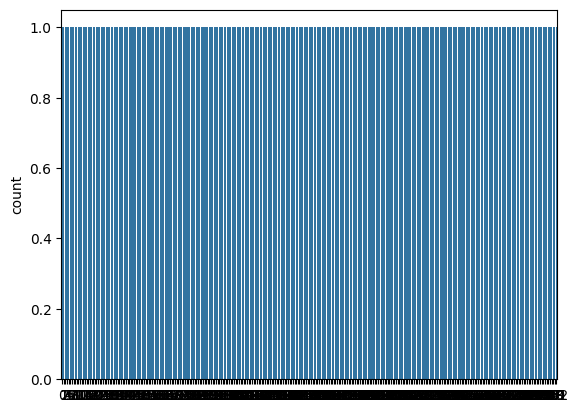

In [19]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

# Percentage of patient with or without heart problems in the given dataset

In [20]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [21]:
data["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

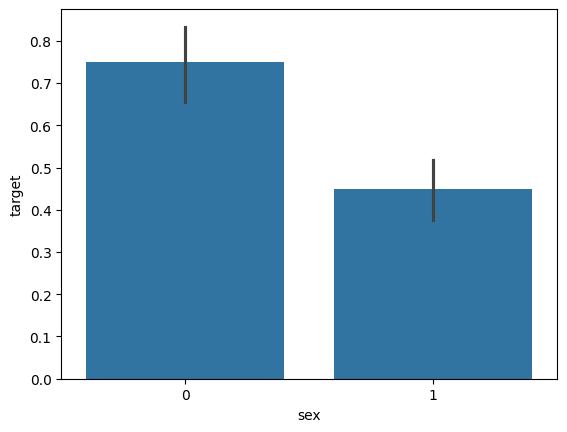

In [22]:
sns.barplot(x="sex", y="target", data=data)


### Here 0 is female and 1 is male patients

In [23]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


# Heart Disease Frequency for ages

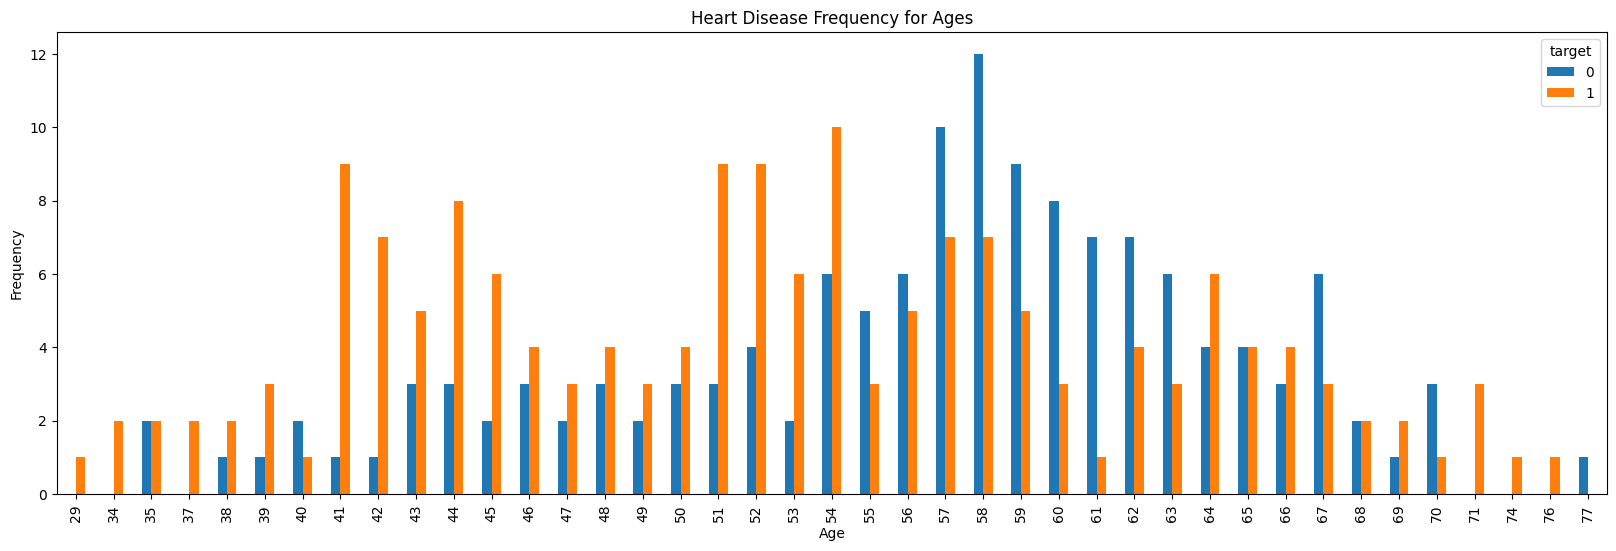

In [24]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

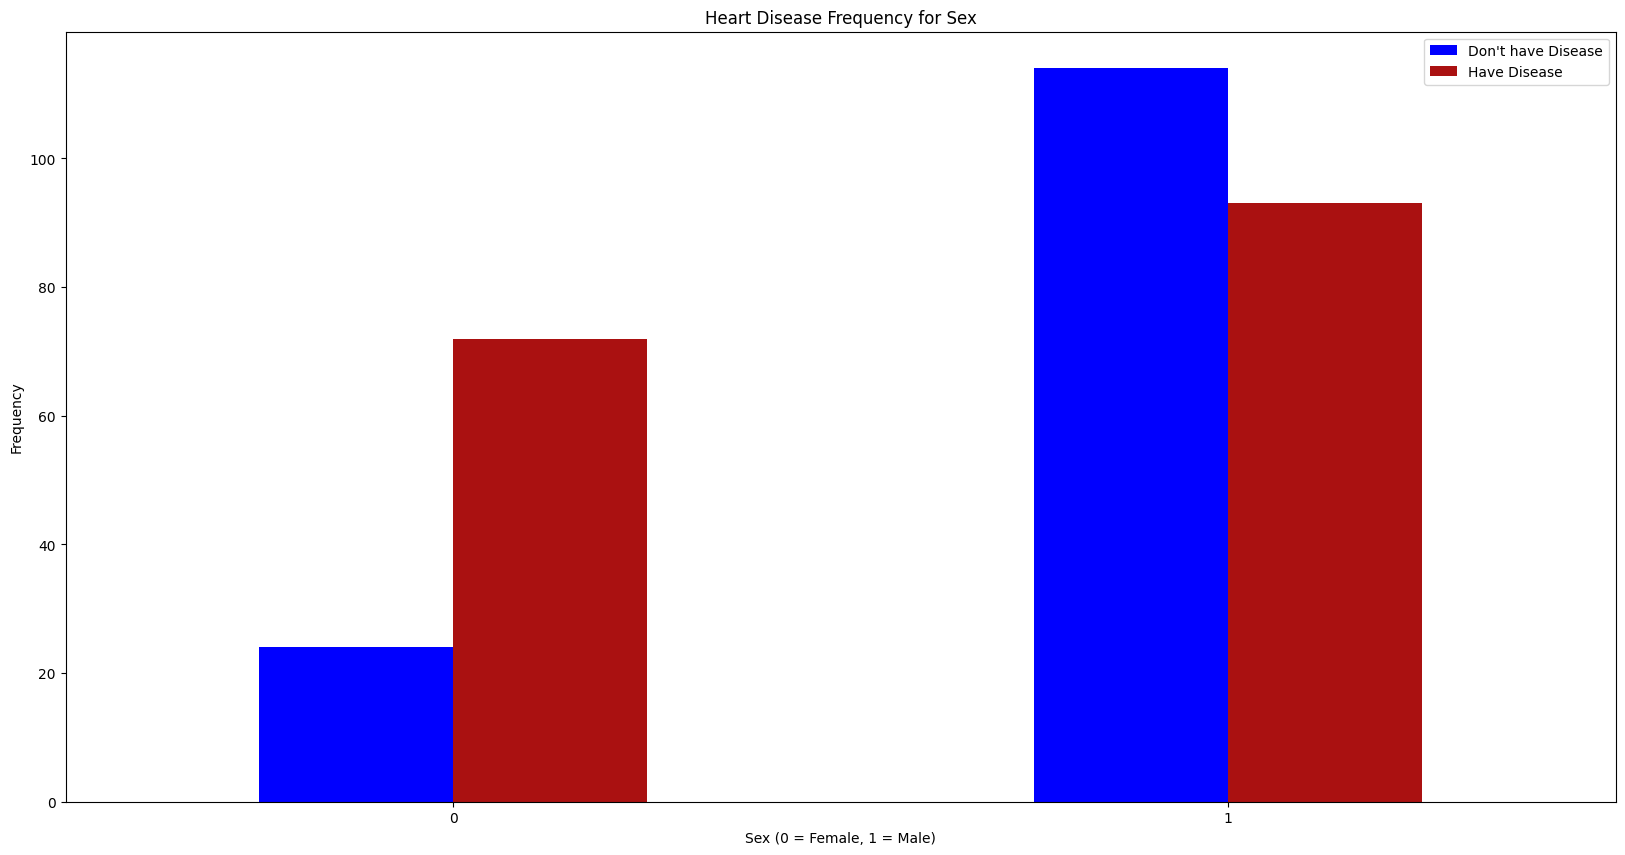

In [25]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

run this line after prediction

In [26]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Heart disease according to Fasting Blood sugar 

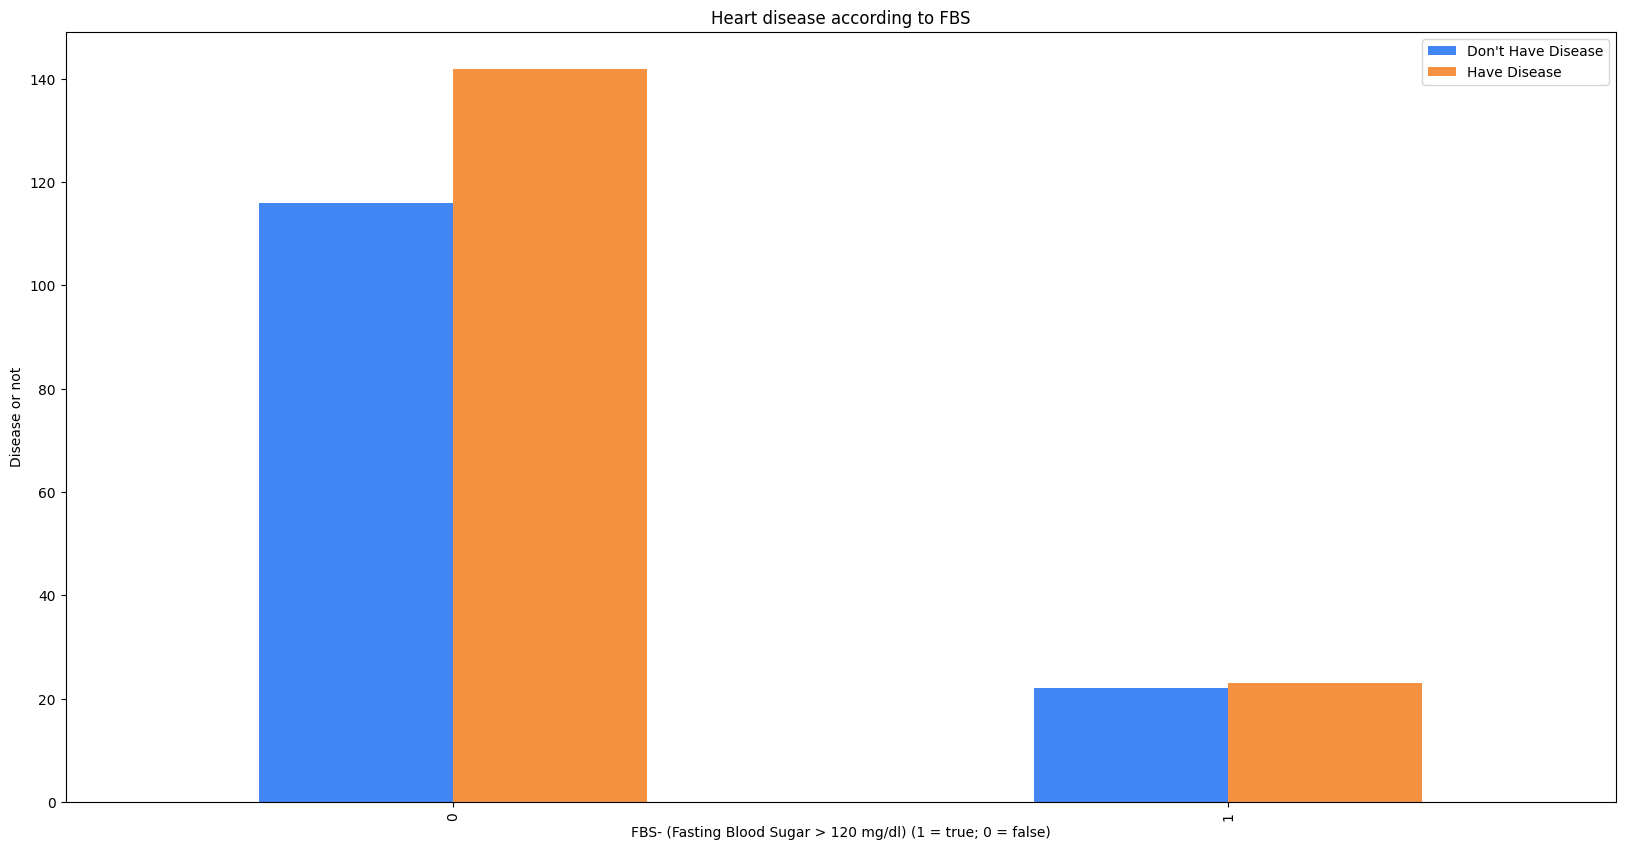

In [27]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [28]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0])

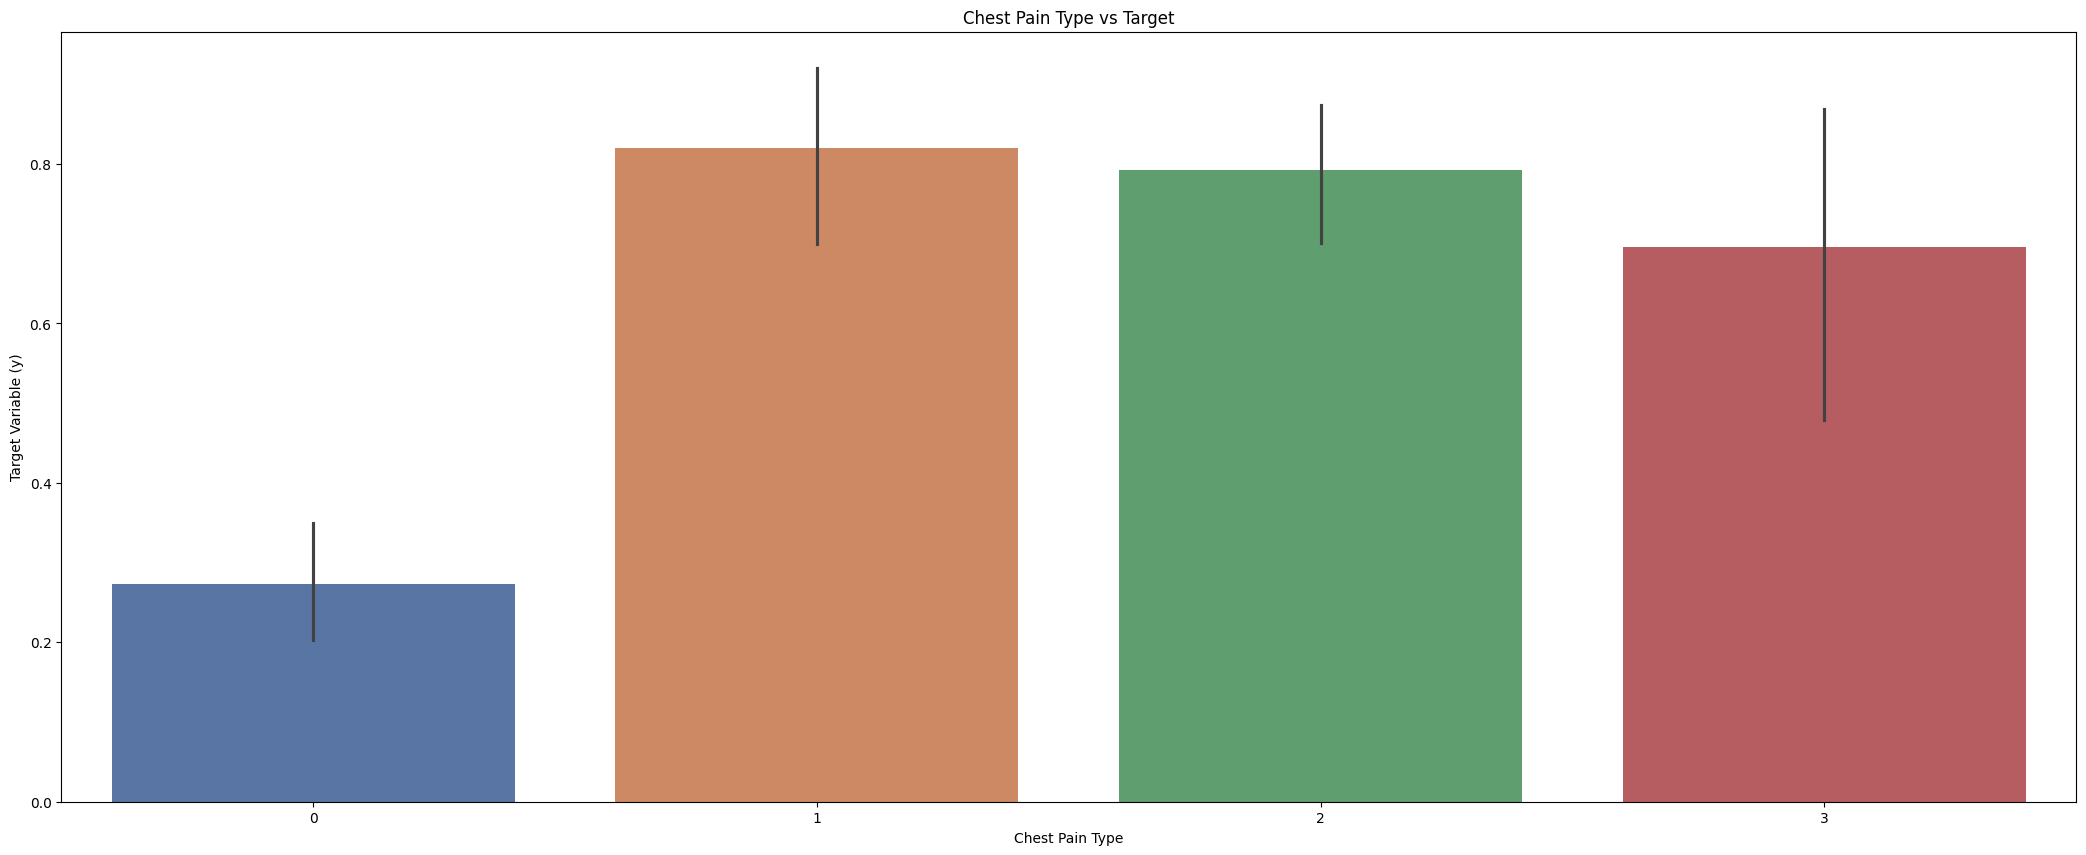

In [29]:
plt.figure(figsize=(26, 10))

colors = ["#4C72B0", "#DD8452", "#55A868", "#C44E52"]
sns.barplot(x=data["chest_pain_type"], y=y, palette=colors)


plt.xlabel("Chest Pain Type")
plt.ylabel("Target Variable (y)")
plt.title("Chest Pain Type vs Target")
plt.show()

# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [30]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

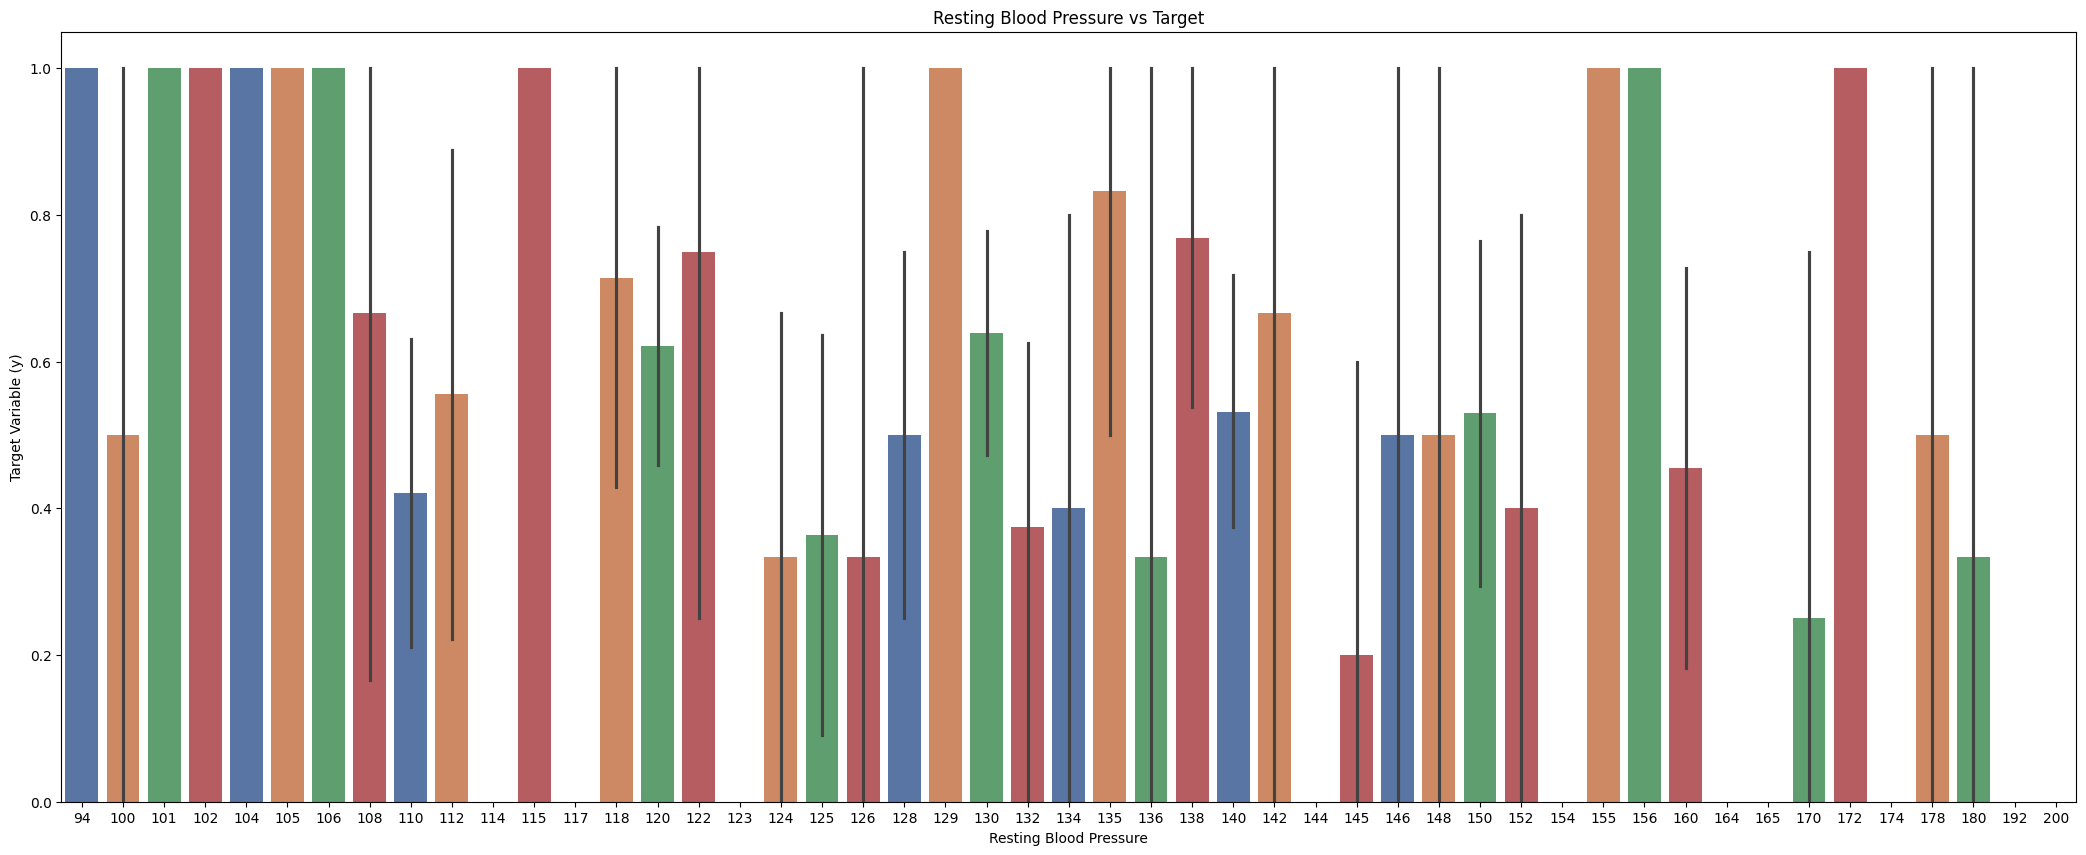

In [31]:
plt.figure(figsize=(26, 10))

colors = ["#4C72B0", "#DD8452", "#55A868", "#C44E52"]

sns.barplot(x=data["resting_blood_pressure"], y=y, palette=colors)

plt.xlabel("Resting Blood Pressure")
plt.ylabel("Target Variable (y)")
plt.title("Resting Blood Pressure vs Target")
plt.show()

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [32]:
data["rest_ecg"].unique()

array([0, 1, 2])

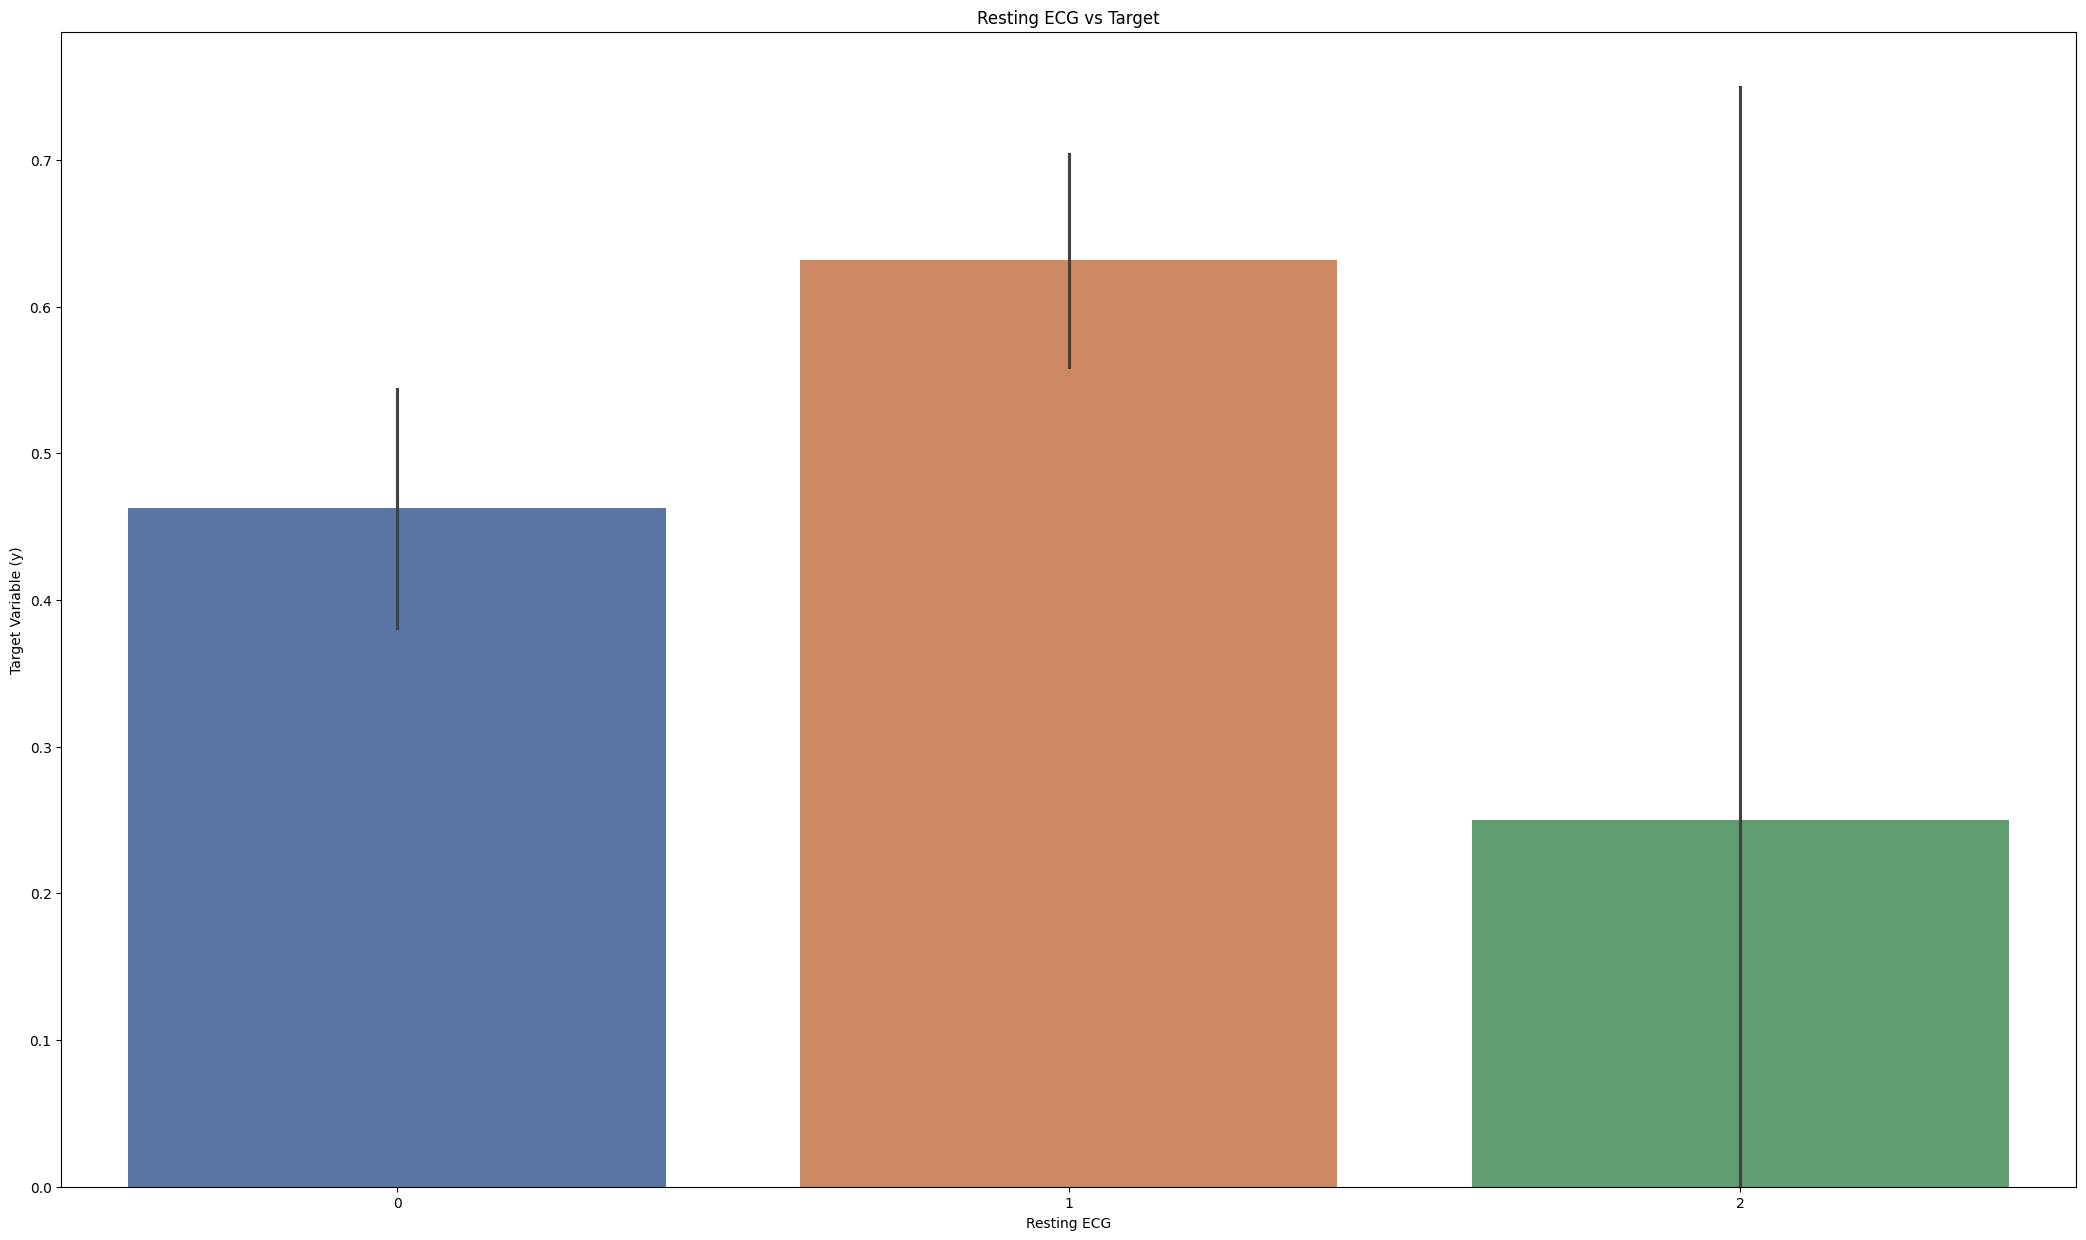

In [33]:
plt.figure(figsize=(26, 15))

colors = ["#4C72B0", "#DD8452", "#55A868"]

sns.barplot(x=data["rest_ecg"], y=y, palette=colors)

plt.xlabel("Resting ECG")
plt.ylabel("Target Variable (y)")
plt.title("Resting ECG vs Target")
plt.show()

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#Analysing Exercise induced angina (1 = yes; 0 = no)

In [34]:
data["exercise_induced_angina"].unique()

array([0, 1])

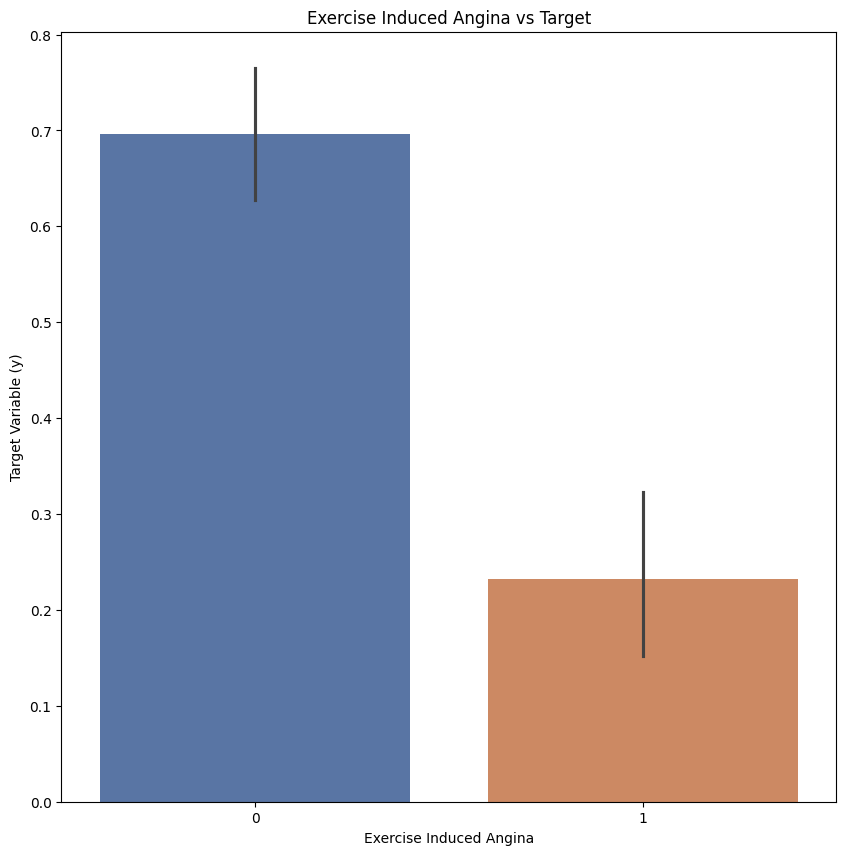

In [43]:
plt.figure(figsize=(10, 10))

colors = ["#4C72B0", "#DD8452"]  

sns.barplot(x=data["exercise_induced_angina"], y=y, palette=colors)

plt.xlabel("Exercise Induced Angina")
plt.ylabel("Target Variable (y)")
plt.title("Exercise Induced Angina vs Target")
plt.show()

###People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [35]:
data["st_slope"].unique()

array([0, 2, 1])

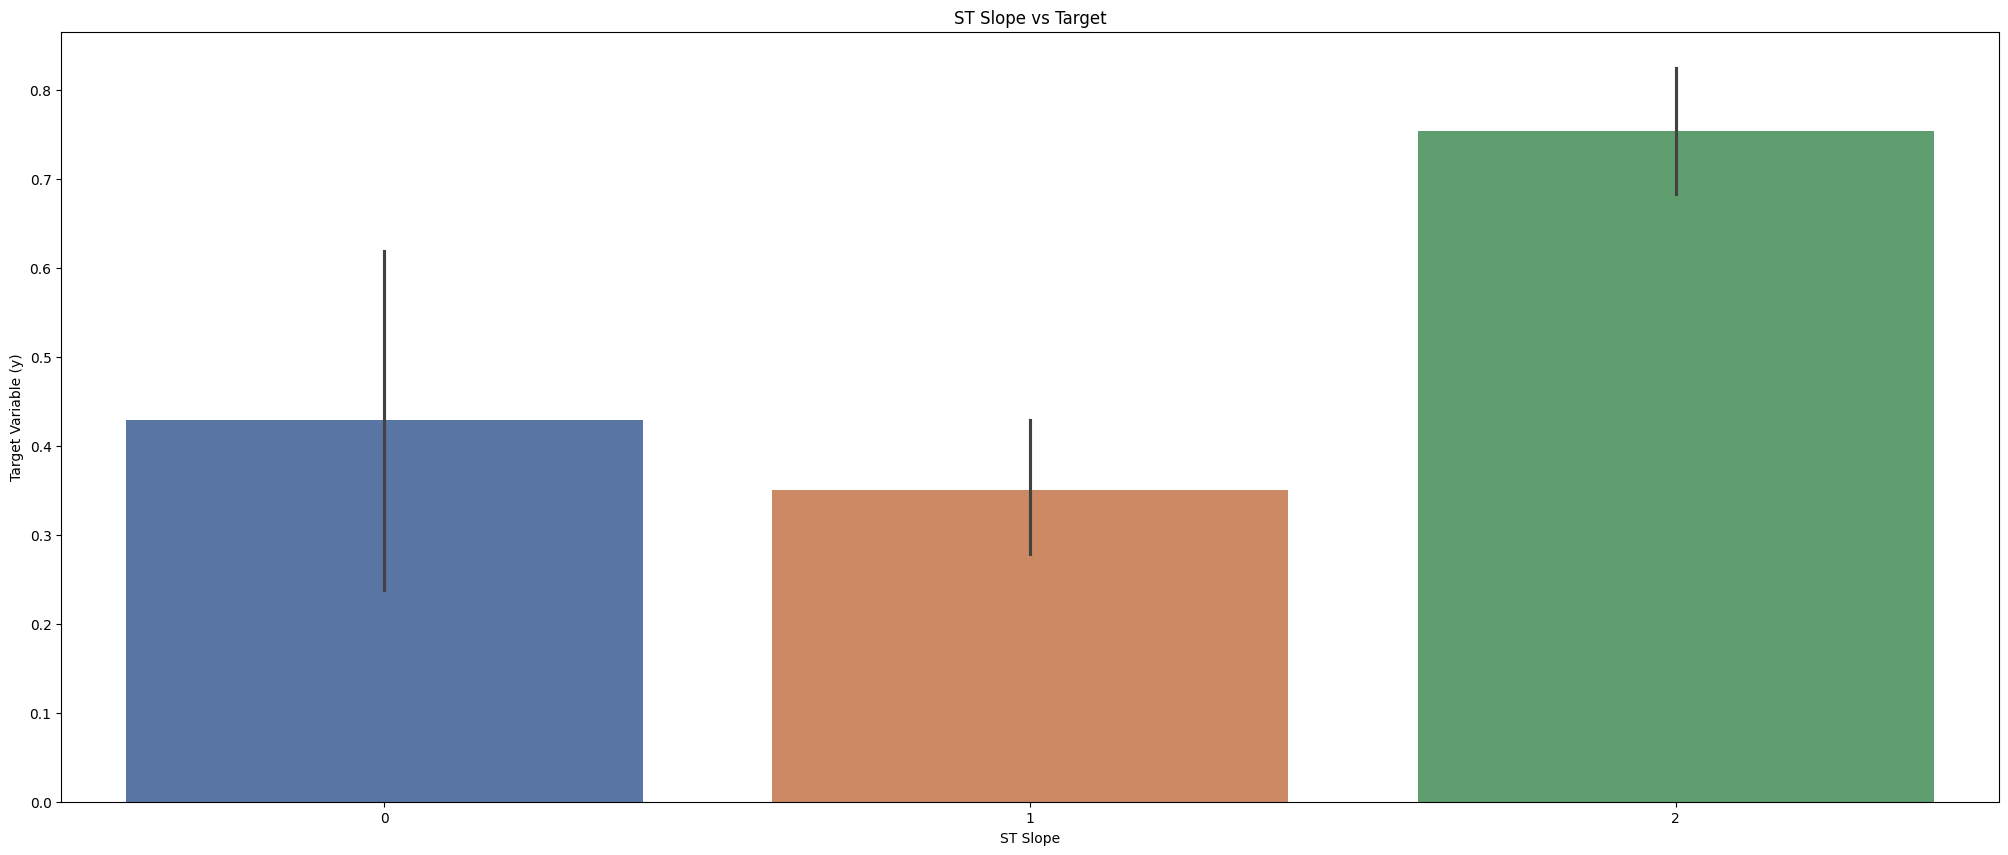

In [ ]:
plt.figure(figsize=(25, 10))

colors = ["#4C72B0", "#DD8452", "#55A868"]  
sns.barplot(x=data["st_slope"], y=y, palette=colors)

plt.xlabel("ST Slope")
plt.ylabel("Target Variable (y)")
plt.title("ST Slope vs Target")
plt.show()

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [36]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4])

### count num_major vessels

<Axes: ylabel='count'>

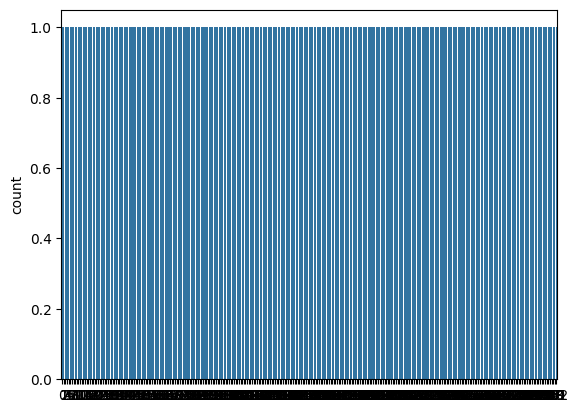

In [37]:
sns.countplot(data["num_major_vessels"])

### comparing with target

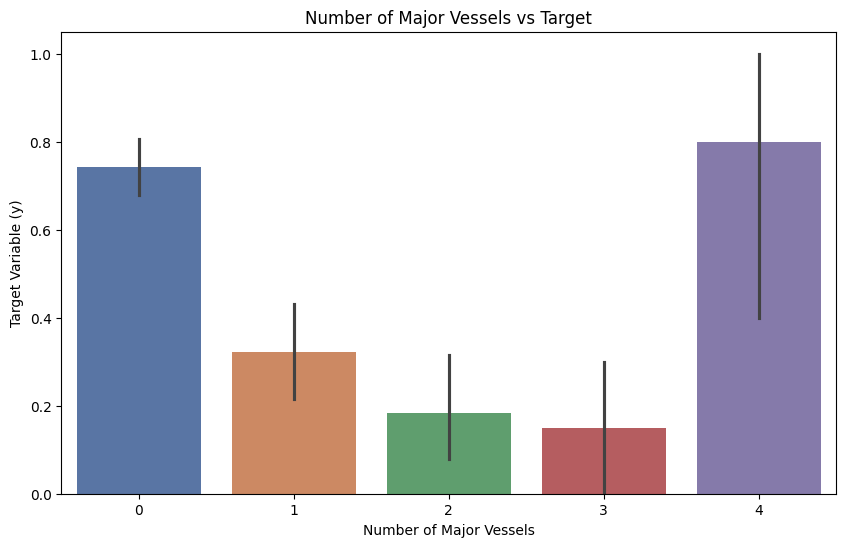

In [38]:
plt.figure(figsize=(10, 6))

colors = ["#4C72B0", "#DD8452", "#55A868", "#C44E52","#8172B2"]  

sns.barplot(x=data["num_major_vessels"], y=y, palette=colors)

plt.xlabel("Number of Major Vessels")
plt.ylabel("Target Variable (y)")
plt.title("Number of Major Vessels vs Target")
plt.show()

### num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [39]:
data["thalassemia"].unique()

array([1, 2, 3, 0])

### plotting the thalassemia distribution (0,1,2,3)

<Axes: xlabel='thalassemia', ylabel='Density'>

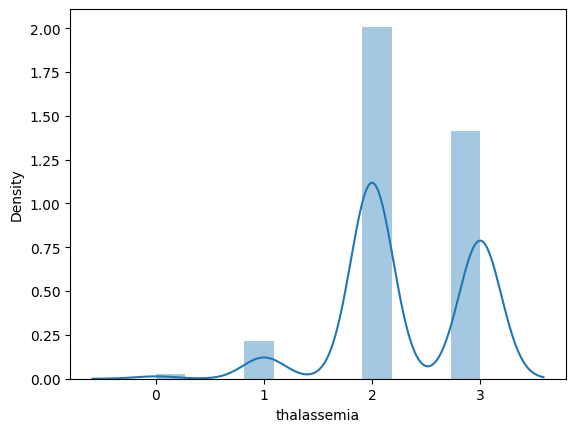

In [40]:
sns.distplot(data["thalassemia"])

### comparing with target

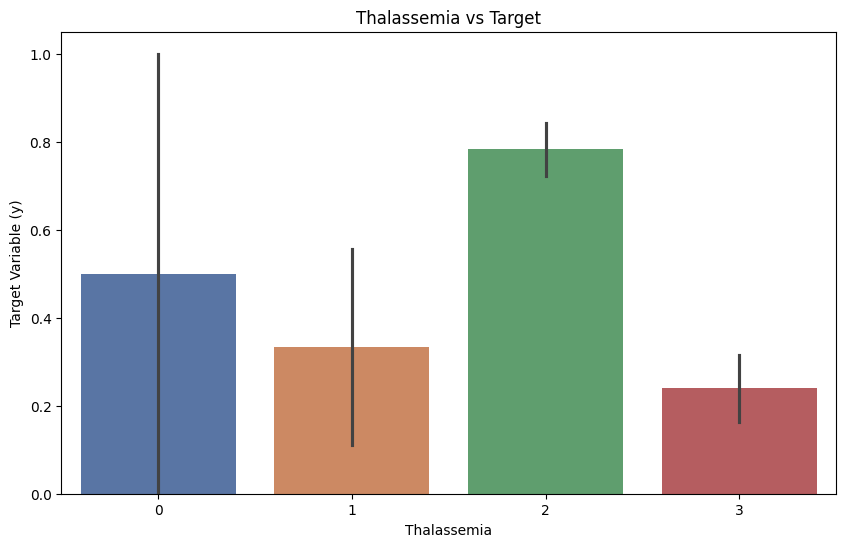

In [41]:
plt.figure(figsize=(10, 6))

colors = ["#4C72B0", "#DD8452", "#55A868", "#C44E52"]  # 4 colors

sns.barplot(x=data["thalassemia"], y=y, palette=colors)

plt.xlabel("Thalassemia")
plt.ylabel("Target Variable (y)")
plt.title("Thalassemia vs Target")
plt.show()

# thalassemia and cholesterol scatterplot

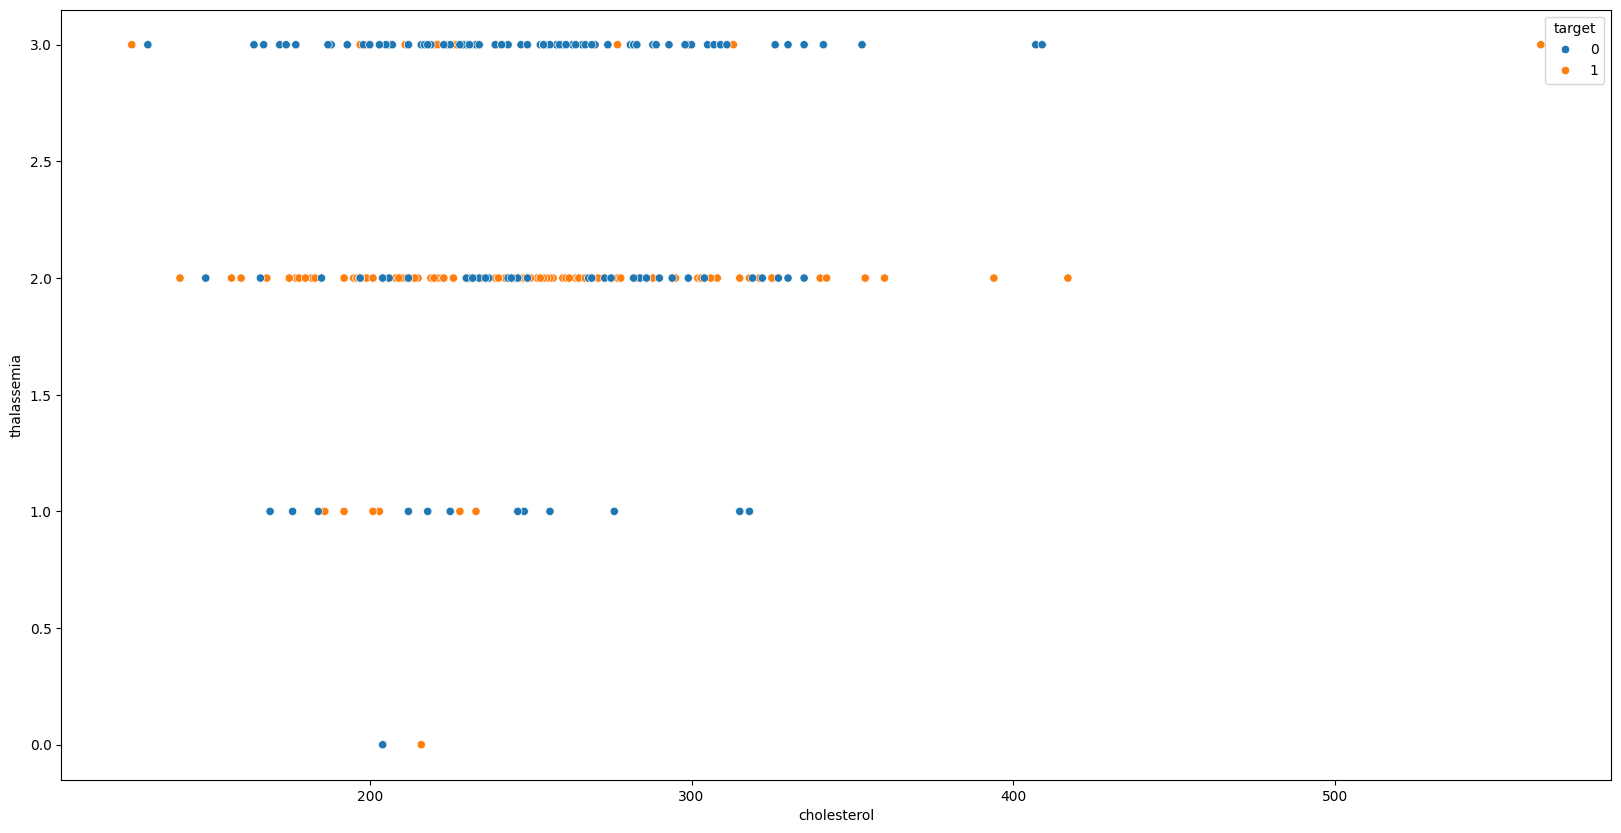

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

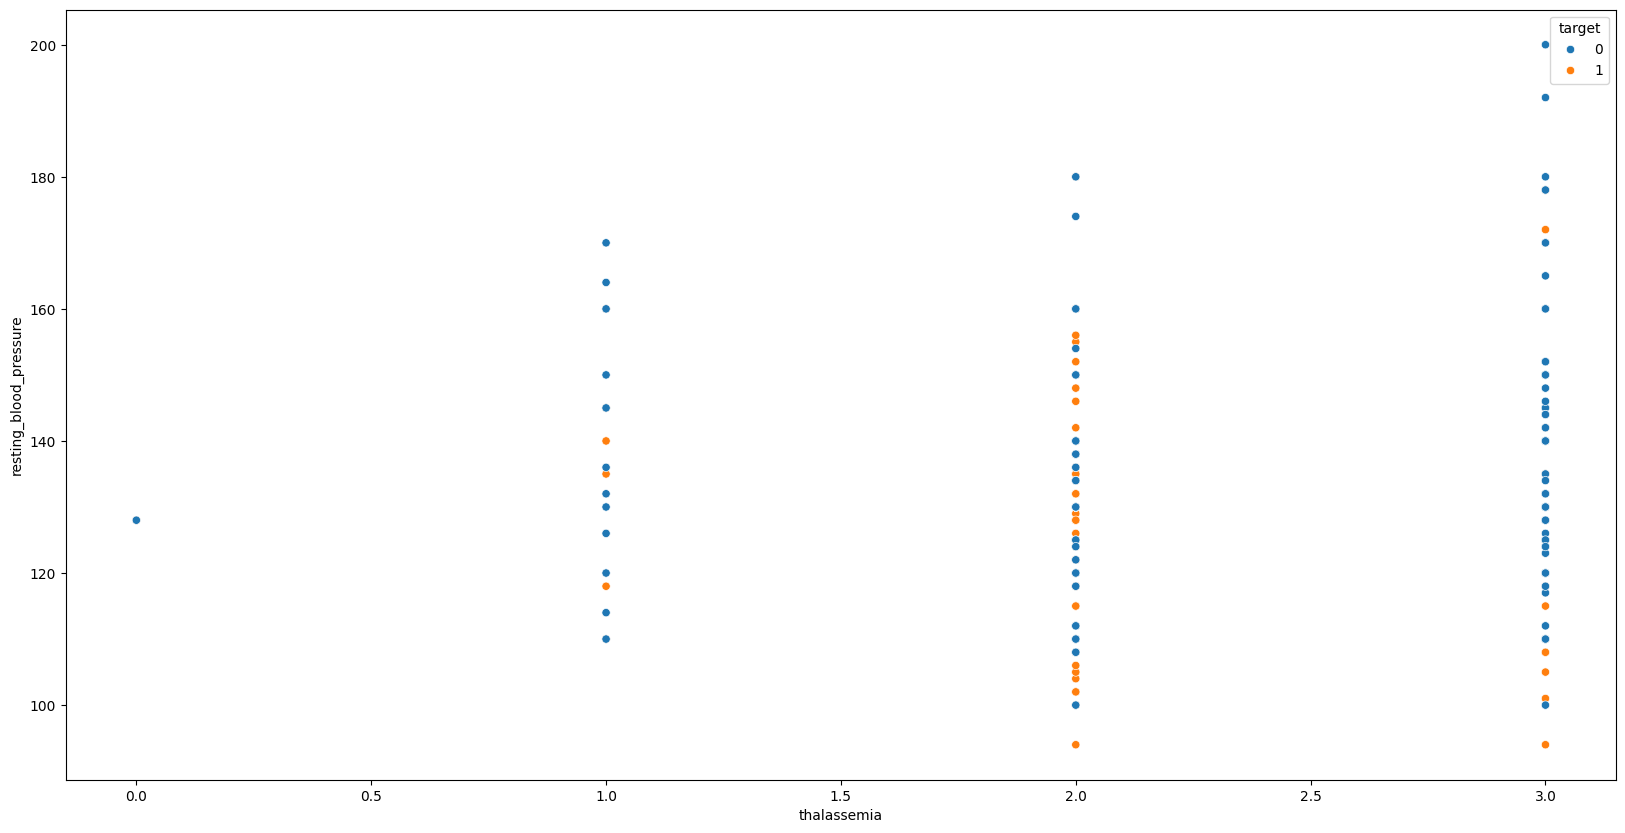

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs age

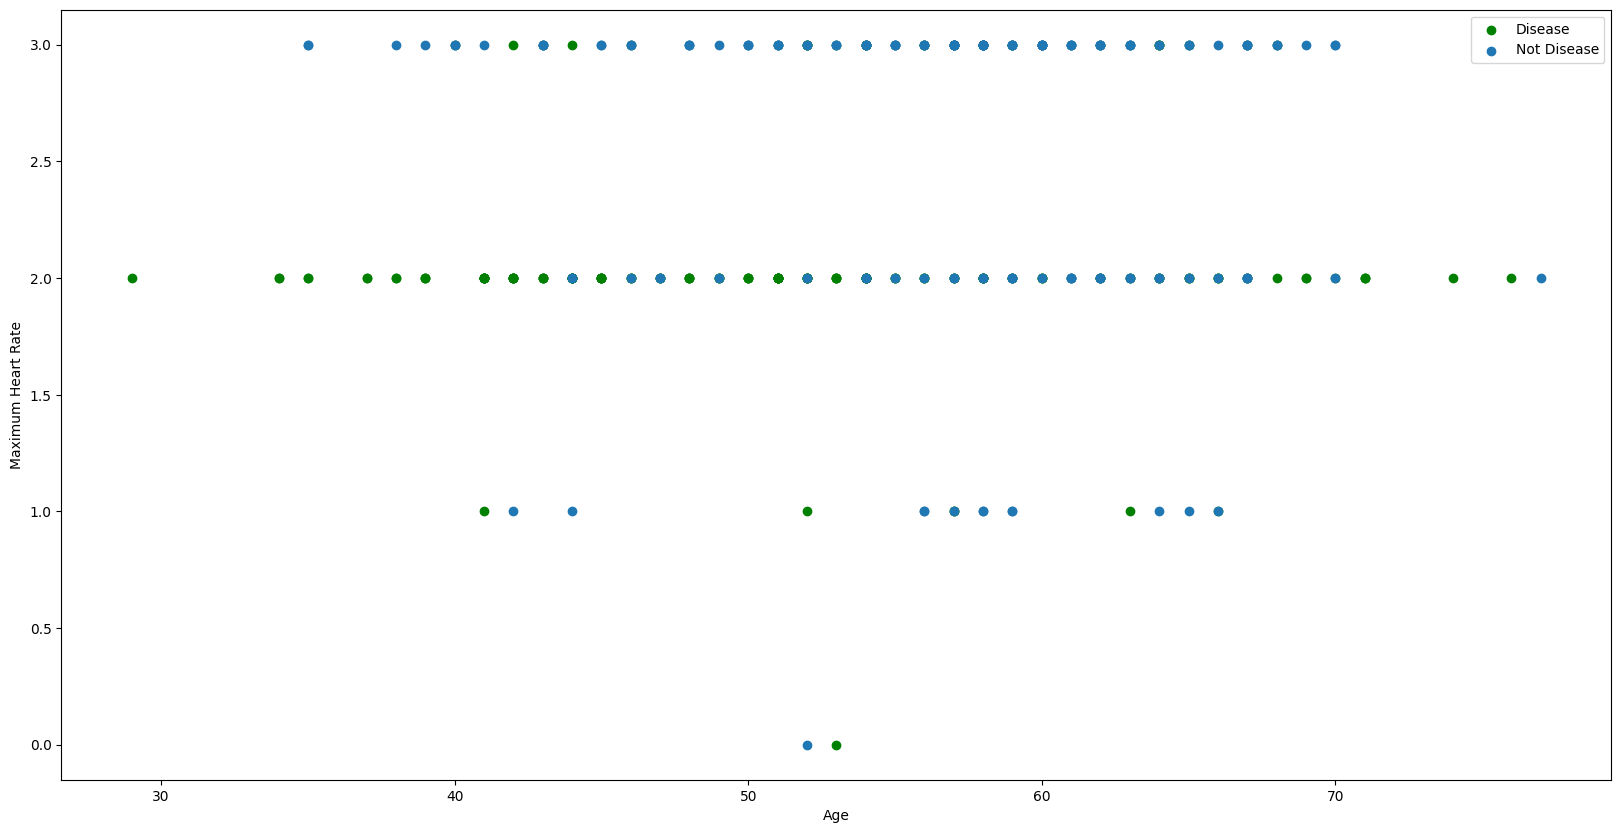

In [44]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [45]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

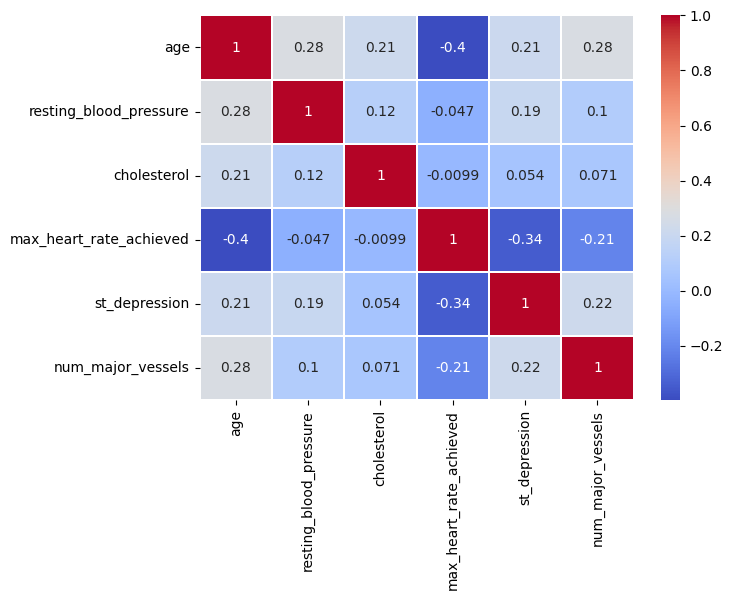

In [46]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

##Correlation analysis

In [47]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


# Splitting the dataset to Train and Test

In [48]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [49]:
X_train.shape

(242, 13)

In [50]:
X_test.shape

(61, 13)

In [51]:
Y_train.shape

(242,)

In [52]:
Y_test.shape

(61,)

## importing Accuracy score

In [53]:
from sklearn.metrics import accuracy_score

# Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, Y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, Y_test)))

Training set score: 0.851
Test set score: 0.852


In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [56]:
Y_pred_lr.shape

(61,)

In [57]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


# Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
matrix= confusion_matrix(Y_test, Y_pred_lr)

<Axes: >

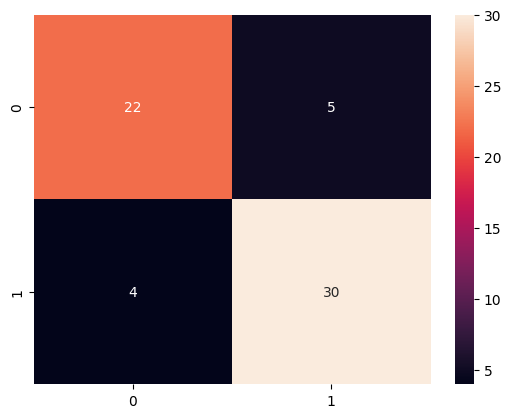

In [60]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [61]:
from sklearn.metrics import precision_score

In [62]:
precision = precision_score(Y_test, Y_pred_lr)

In [63]:
print("Precision: ",precision)

Precision:  0.8571428571428571


# Recall

In [64]:
from sklearn.metrics import recall_score

In [65]:
recall = recall_score(Y_test, Y_pred_lr)

In [66]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706




---



# F-Score

balance of precision and recall score

In [67]:
print((2*precision*recall)/(precision+recall))

0.8695652173913043


In [69]:
from sklearn.metrics import confusion_matrix


CM = confusion_matrix(Y_test, Y_pred_lr)

# Let Us Save TN, FP, FN, TP 
TN = CM[0, 0]
FP = CM[0, 1]
FN = CM[1, 0]
TP = CM[1, 1]

# Print the values
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)


True Negative (TN): 22
False Positive (FP): 5
False Negative (FN): 4
True Positive (TP): 30


## false negative rate of the model

In [70]:
fnr=FN*100/(FN+TP)
fnr

np.float64(11.764705882352942)

# Random Forest

In [71]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


Now, let us prune the depth of trees and check the accuracy.

In [72]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.869


In [73]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

90.16
323


In [74]:
Y_pred_rf.shape

(61,)

In [75]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
matrix= confusion_matrix(Y_test, Y_pred_rf)

<Axes: >

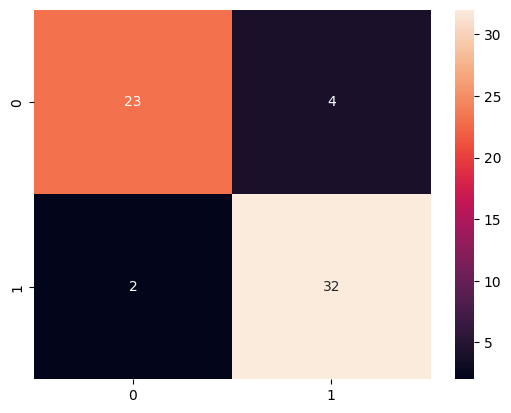

In [78]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [79]:
from sklearn.metrics import precision_score

In [80]:
precision = precision_score(Y_test, Y_pred_rf)

In [81]:
print("Precision: ",precision)

Precision:  0.8888888888888888


# recall

In [82]:
from sklearn.metrics import recall_score

In [83]:
recall = recall_score(Y_test, Y_pred_rf)

In [84]:
print("Recall is: ",recall)

Recall is:  0.9411764705882353


# F score

In [85]:
print((2*precision*recall)/(precision+recall))

0.9142857142857143


### cm using bad style

In [86]:
CM =pd.crosstab(Y_test, Y_pred_rf)
CM

col_0,0,1
target,,
0,23,4
1,2,32


In [87]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## False negative rate of the model

In [88]:
fnr=FN*100/(FN+TP)
fnr

np.float64(5.882352941176471)

# Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [91]:
Y_pred_nb.shape

(61,)

In [92]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


## confusion matrix of Naive Bayes

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
matrix= confusion_matrix(Y_test, Y_pred_nb)

<Axes: >

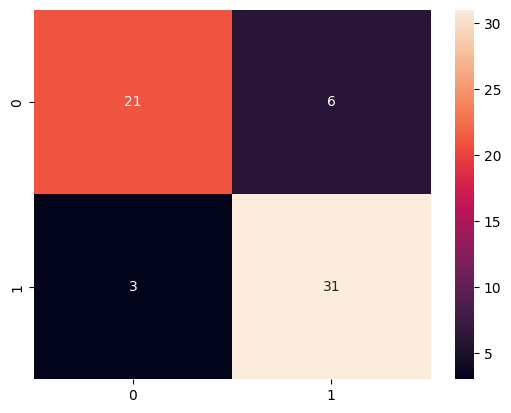

In [95]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [96]:
from sklearn.metrics import precision_score

In [97]:
precision = precision_score(Y_test, Y_pred_nb)

In [98]:
print("Precision: ",precision)

Precision:  0.8378378378378378


# recall

In [99]:
from sklearn.metrics import recall_score

In [100]:
recall = recall_score(Y_test, Y_pred_nb)

In [101]:
print("Recall is: ",recall)

Recall is:  0.9117647058823529


# f score

In [102]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


### bad cm style

In [103]:
CM = pd.crosstab(Y_test, Y_pred_nb)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [104]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [105]:
fnr = FN*100/(FN+TP)
fnr

np.float64(8.823529411764707)

# KNN(K Nearest Neighbors)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [107]:
Y_pred_knn.shape

(61,)

In [108]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


## Confusion matrix

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
matrix= confusion_matrix(Y_test, Y_pred_knn)

<Axes: >

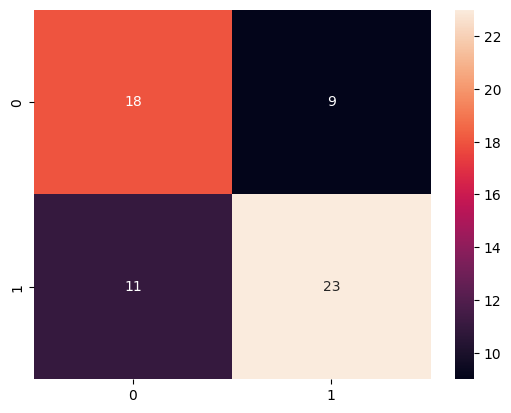

In [111]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [112]:
from sklearn.metrics import precision_score

In [113]:
precision = precision_score(Y_test, Y_pred_knn)

In [114]:
print("Precision: ",precision)

Precision:  0.71875


# recall

In [115]:
from sklearn.metrics import recall_score

In [116]:
recall = recall_score(Y_test, Y_pred_knn)

In [117]:
print("Recall is: ",recall)

Recall is:  0.6764705882352942


# f score

In [118]:
print((2*precision*recall)/(precision+recall))

0.696969696969697


### bad cm

In [119]:
CM = pd.crosstab(Y_test, Y_pred_knn)
CM

col_0,0,1
target,,
0,18,9
1,11,23


In [120]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [121]:
fnr = FN*100/(FN+TP)
fnr

np.float64(32.35294117647059)

## for neighbors = 4

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train)
Y_pred_knn4=knn.predict(X_test)

In [123]:
Y_pred_knn4.shape

(61,)

In [124]:
score_knn_4 = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn_4)+" %")

The accuracy score achieved using KNN is: 67.21 %


## false negative rate

In [125]:
CM = pd.crosstab(Y_test, Y_pred_knn4)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

np.float64(41.1764705882353)

# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [127]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.820


In [128]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [129]:
print(Y_pred_dt.shape)

(61,)


# Discision Tree Visualization

In [130]:
df = pd.read_csv('heart.csv')

In [131]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [132]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [5]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [133]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)


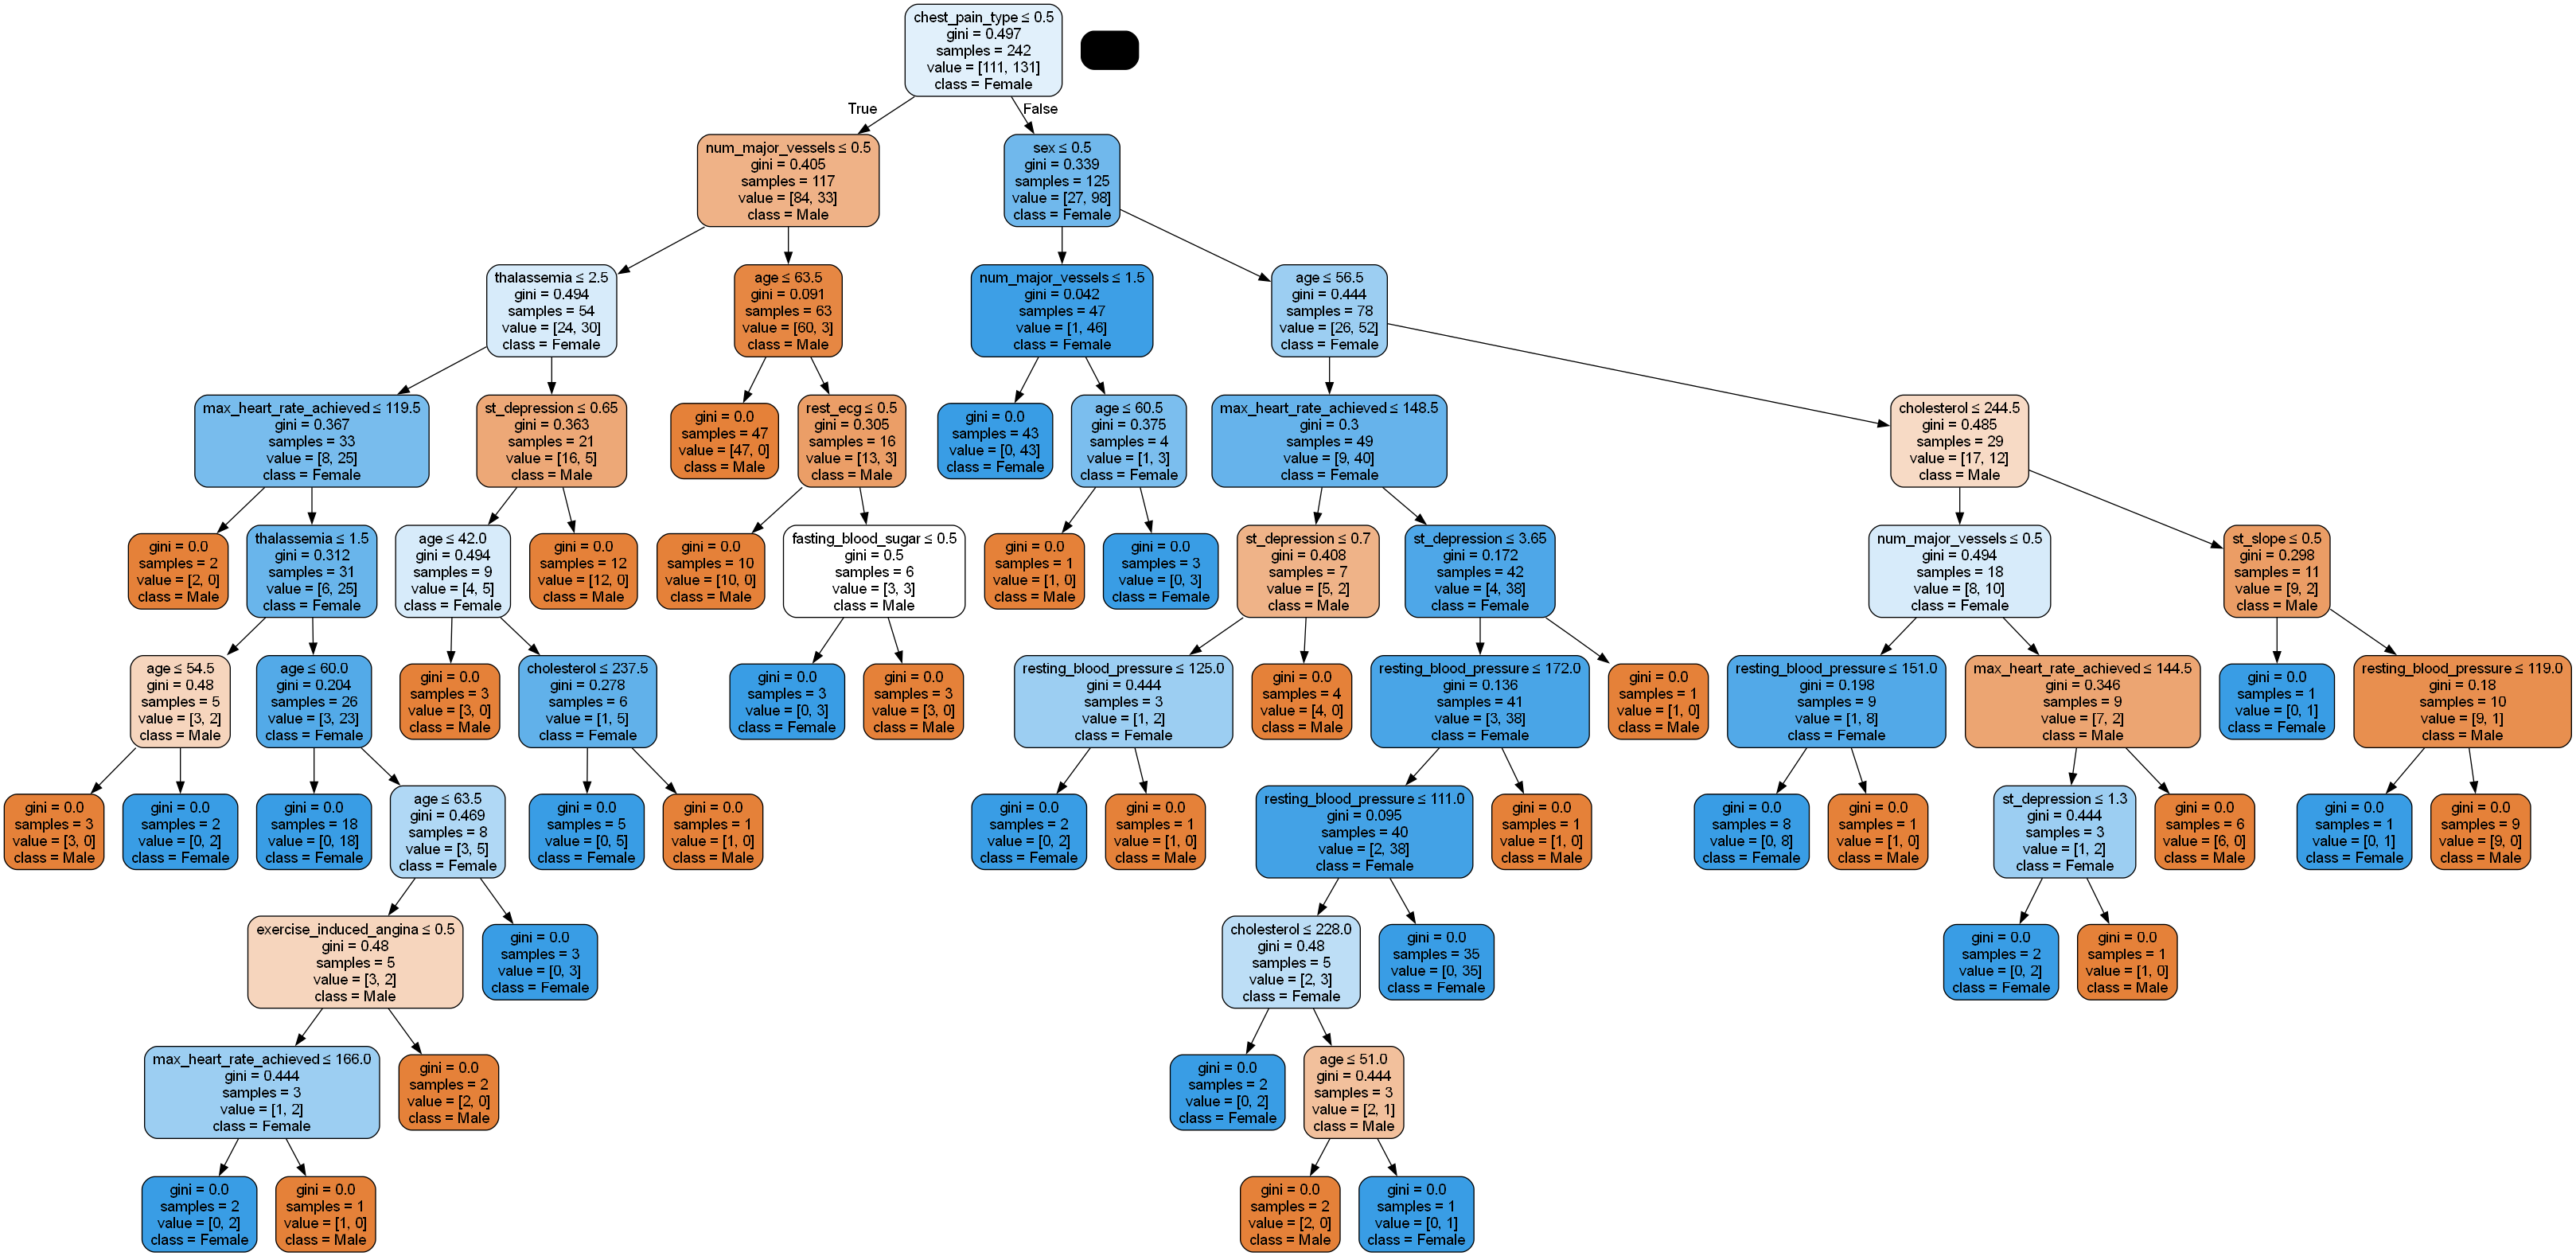

In [135]:
plot_decision_tree(clf, X_train.columns, ['Male', 'Female'])


### accuracy

In [136]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


## Confusion Matrix

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
matrix= confusion_matrix(Y_test, Y_pred_dt)

<Axes: >

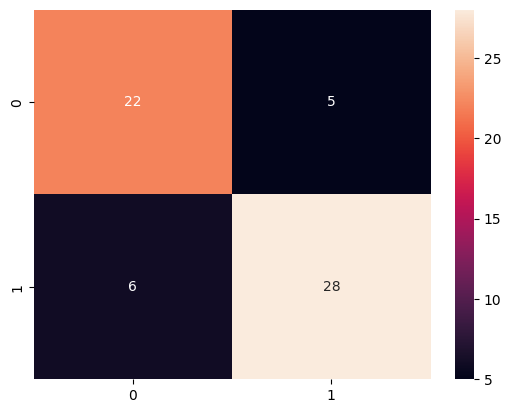

In [140]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [141]:
from sklearn.metrics import precision_score

In [142]:
precision = precision_score(Y_test, Y_pred_dt)

In [143]:
print("Precision: ",precision)

Precision:  0.8484848484848485


# recall

In [144]:
from sklearn.metrics import recall_score

In [145]:
recall = recall_score(Y_test, Y_pred_dt)

In [146]:
print("Recall is: ",recall)

Recall is:  0.8235294117647058


# f score

In [147]:
print((2*precision*recall)/(precision+recall))

0.8358208955223881


### bad cm style

In [148]:
CM = pd.crosstab(Y_test, Y_pred_dt)
CM

col_0,0,1
target,,
0,22,5
1,6,28


## false negative rate

In [149]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

np.float64(17.647058823529413)

# FINAL SCORE

In [150]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %


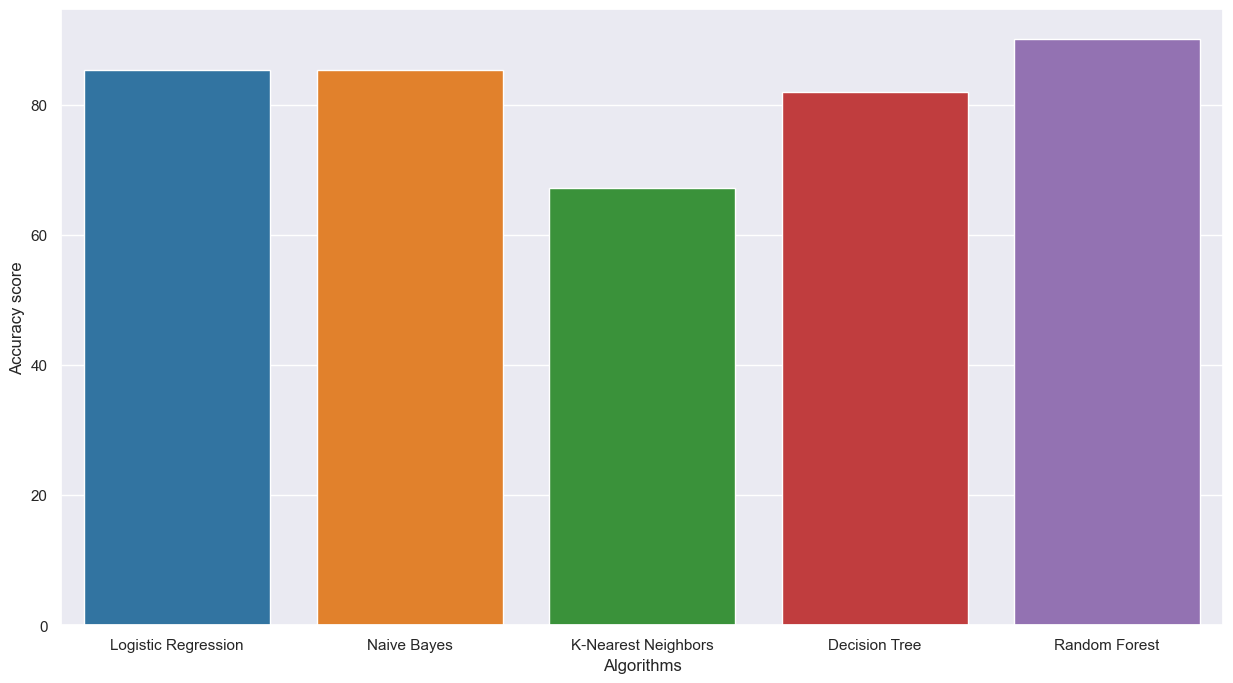

In [155]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores, palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
plt.show()

# In this project, We have used Machine Learning to predict whether a person is suffering from a heart disease or not. After importing the data, we have analysed it using plots. Then, generated categorical features and scaled other features. Then applied five Machine Learning algorithms: K Nearest Neighbors Classifier, Naive Bayes, Logistic Regression, Decision Tree Classifier and Random Forest Classifier. In the end, Random Forest achieved the highest score of 95.08%.

In [157]:
import pickle
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)




---

